<a href="https://colab.research.google.com/github/ferdmartin/LearningLeap/blob/main/LR_Regularization_CV_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LR, Regularization, CV & LR

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1

In [ ]:
# Read datasets
train_100_10 = pd.read_csv("train-100-10.csv"); test_100_10 = pd.read_csv("test-100-10.csv")

X_train_100_10 = train_100_10.drop("y",axis=1)
y_train_100_10 = train_100_10.y
X_test_100_10 = test_100_10.drop("y",axis=1)
y_test_100_10 = test_100_10.y
####################################################
train_100_100 = pd.read_csv("train-100-100.csv"); test_100_100 = pd.read_csv("test-100-100.csv")

X_train_100_100 = train_100_100.drop("y",axis=1)
y_train_100_100 = train_100_100.y
X_test_100_100 = test_100_100.drop("y",axis=1)
y_test_100_100 = test_100_100.y
####################################################
train_1000_100 = pd.read_csv("train-1000-100.csv")
X_train_1000_100 = train_1000_100.drop("y",axis=1)
y_train_1000_100 = train_1000_100.y

train_50_1000_100 = pd.read_csv("train-50(1000)-100.csv")
X_train_50_1000_100 = train_50_1000_100.drop("y",axis=1)
y_train_50_1000_100 = train_50_1000_100.y

train_100_1000_100 = pd.read_csv("train-100(1000)-100.csv")
X_train_100_1000_100 = train_100_1000_100.drop("y",axis=1)
y_train_100_1000_100 = train_100_1000_100.y

train_150_1000_100 = pd.read_csv("train-150(1000)-100.csv")
X_train_150_1000_100 = train_150_1000_100.drop("y",axis=1)
y_train_150_1000_100 = train_150_1000_100.y

test_1000_100 = pd.read_csv("test-1000-100.csv")
X_test_1000_100 =test_1000_100.drop("y",axis=1)
y_test_1000_100 = test_1000_100.y

In [ ]:
# Defining Mean Squared Error function
def MSE(predictions, ground_truth):
    diff_squared = (predictions - ground_truth)**2
    return np.average(diff_squared)

## Question 2: Regularization

In [ ]:
# Linear Regression class with ridge regularization parameter
class LinearRegression:
    import numpy as np
    def __init__(self, ridge_lambda=0):
        self.ridge_lambda = ridge_lambda
        self.order = None

    def change_order(self, matrix, order):
        matrix = np.append(np.array(matrix), np.ones(shape=[np.array(matrix).shape[0],1]),axis=1)
        to_concatenate = []
        for iteration in range(1,order+1):
            to_concatenate.append(matrix**iteration)
        matrix = np.concatenate(to_concatenate,axis=1)
        return matrix

    def fit(self, x, y, order=1):
        self.order = order
        x = self.change_order(x, self.order)
        y = np.array(y)
        x_t = np.transpose(x)
        x_t_x = np.dot(x_t,x)
        regularization_factor = self.ridge_lambda*np.identity(np.shape(x_t_x)[0])
        x_dagger = np.dot(np.linalg.inv(x_t_x+regularization_factor), x_t)
        self.weights = np.dot(x_dagger, y)

    def predict(self,X_test):
        X_test = self.change_order(X_test, self.order)
        return np.dot(X_test, self.weights)

def MSE(predictions, ground_truth):
    diff_squared = (predictions - ground_truth)**2
    return np.average(diff_squared)

In [ ]:
# Calculate Ridge Regression to each of the datasets and calculate MSE
def MSEs_saver(X_train, y_train, X_test,y_test, lambdas=150):
    MSEs = []
    for lambda_ridge in range(0,lambdas+1):
        linear_model = LinearRegression(ridge_lambda=lambda_ridge)
        linear_model.fit(X_train, y_train)
        predictions = linear_model.predict(X_test)
        MSEs.append(MSE(predictions, y_test))
    return MSEs

MSEs = pd.DataFrame([])

MSEs['Train_set-100-10'] = MSEs_saver(X_train_100_10,y_train_100_10, X_train_100_10,y_train_100_10)
MSEs['Train_set-100-100'] = MSEs_saver(X_train_100_100,y_train_100_100, X_train_100_100,y_train_100_100)
MSEs['Train_set-1000-100'] = MSEs_saver(X_train_1000_100,y_train_1000_100, X_train_1000_100,y_train_1000_100)
MSEs['Train_set-50(1000)-100'] = MSEs_saver(X_train_50_1000_100,y_train_50_1000_100, X_train_50_1000_100,y_train_50_1000_100)
MSEs['Train_set-100(1000)-100'] = MSEs_saver(X_train_100_1000_100,y_train_100_1000_100, X_train_100_1000_100,y_train_100_1000_100)
MSEs['Train_set-150(1000)-100'] = MSEs_saver(X_train_150_1000_100,y_train_150_1000_100, X_train_150_1000_100,y_train_150_1000_100)

MSEs['Test_set-100-10'] = MSEs_saver(X_train_100_10,y_train_100_10, X_test_100_10, y_test_100_10)
MSEs['Test_set-100-100'] = MSEs_saver(X_train_100_100,y_train_100_100, X_test_100_100, y_test_100_100)
MSEs['Test_set-1000-100'] = MSEs_saver(X_train_1000_100,y_train_1000_100, X_test_1000_100, y_test_1000_100)
MSEs['Test_set-50(1000)-100'] = MSEs_saver(X_train_50_1000_100,y_train_50_1000_100, X_test_1000_100, y_test_1000_100)
MSEs['Test_set-100(1000)-100'] = MSEs_saver(X_train_100_1000_100,y_train_100_1000_100, X_test_1000_100, y_test_1000_100)
MSEs['Test_set-150(1000)-100'] = MSEs_saver(X_train_150_1000_100,y_train_150_1000_100, X_test_1000_100, y_test_1000_100)

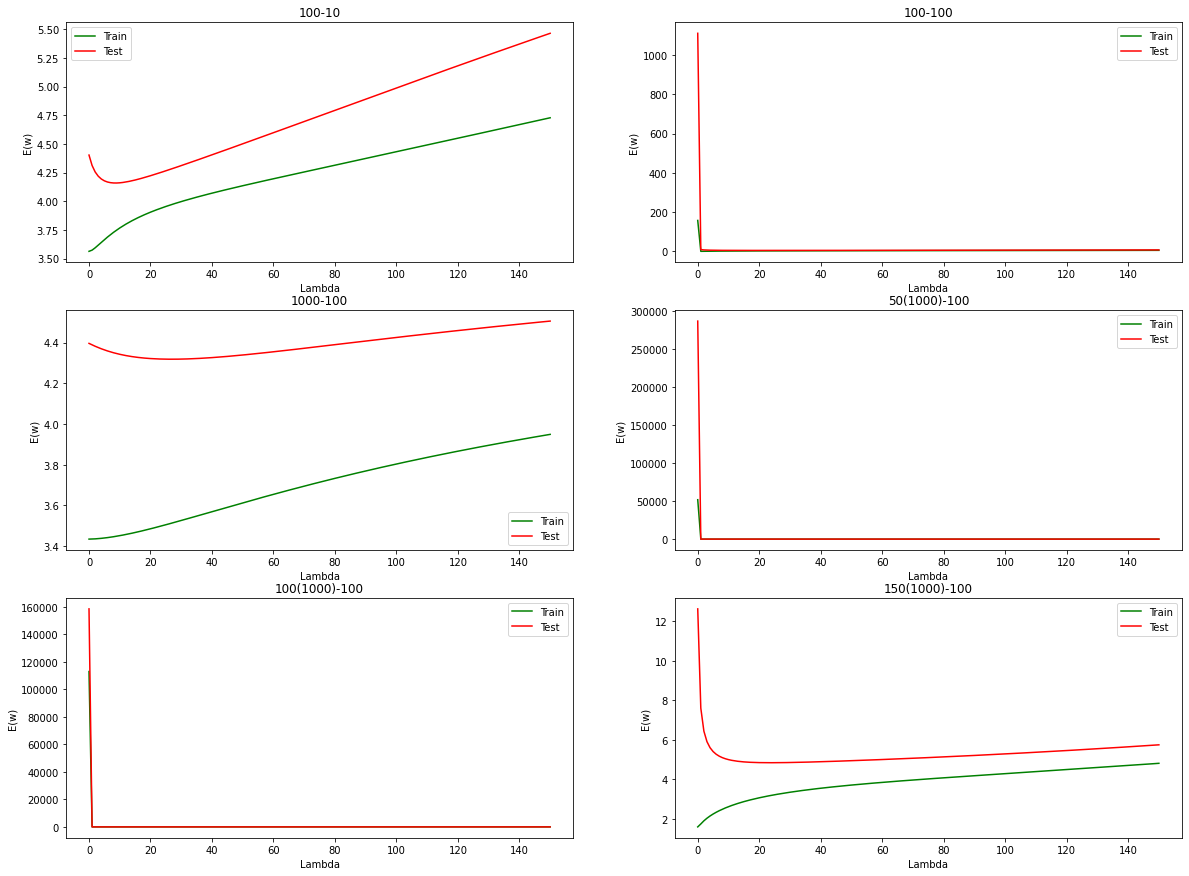

In [ ]:
# Plotting both training set MSE and test set MSE
Unique_plots = [x[9:] for x in MSEs.columns if x.find("Train")]
plt.figure(figsize=(20,15))
for number,column in enumerate(Unique_plots):
    ax = plt.subplot(3, 2, 1+number)
    plt.title(f"{column}")
    ax.plot(MSEs[f"Train_set-{column}"], color="g")
    ax.plot(MSEs[f"Test_set-{column}"], color="r")
    ax.legend(["Train","Test"])
    plt.xlabel("Lambda")
    plt.ylabel("E(w)")
    plt.tight_layout

### 2(a) For each dataset, which λ value gives the least test set MSE?

In [ ]:
least_MSE = pd.DataFrame({"MSE Test":MSEs.min(),
                          "λ":[MSEs[MSEs[col]==MSEs[col].min()].index.values[0] for col in MSEs.columns]})
least_MSE.iloc[6:]

,MSE Test,λ
Test_set-100-10,4.159664,9
Test_set-100-100,5.072750,22
Test_set-1000-100,4.318370,27
Test_set-50(1000)-100,5.512274,8
Test_set-100(1000)-100,5.196200,19
Test_set-150(1000)-100,4.843720,24


### 2(b) For each of datasets 100-100, 50(1000)-100, 100(1000)-100, provide an additional graph with λ ranging from 1 to 150.

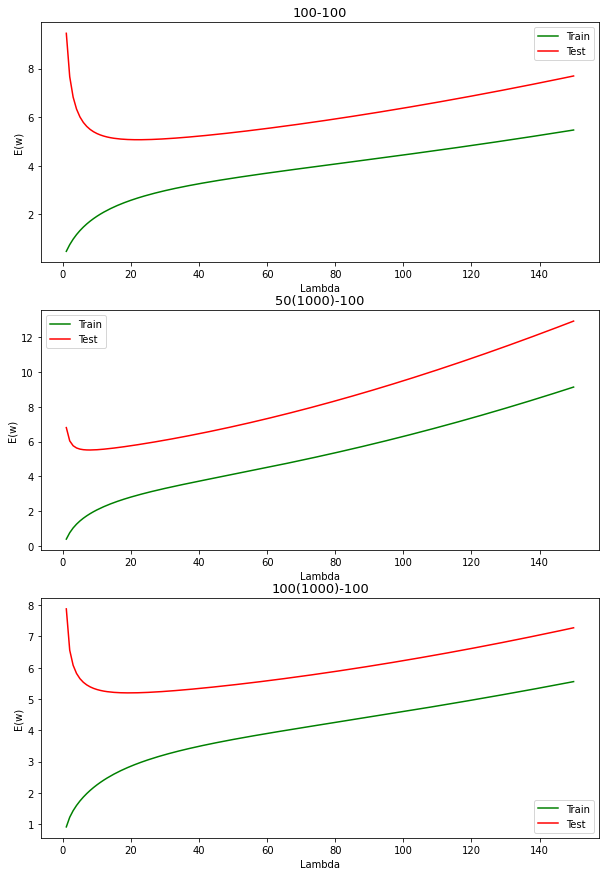

In [ ]:
Unique_plots = [x for x in [x[9:] for x in MSEs.columns if x.find("Train")] if x in ['100-100', '50(1000)-100', '100(1000)-100']]

plt.figure(figsize=(10,15))
for number,column in enumerate(Unique_plots):
    ax = plt.subplot(3, 1, 1+number)
    plt.title(f"{column}", fontsize=13)
    ax.plot(MSEs[f"Train_set-{column}"].iloc[1:], color="g")
    ax.plot(MSEs[f"Test_set-{column}"].iloc[1:], color="r")
    ax.legend(["Train","Test"])
    plt.xlabel("Lambda")
    plt.ylabel("E(w)")
    plt.tight_layout

### 2(c) Explain why λ = 0 (i.e., no regularization) gives abnormally large MSEs for those three datasets in (b).

When we analyze their corresponding **train datasets' shapes** (rows, columns), we can observe that each holds a less or equal number of observations(rows) than features/variables (columns). Given this scenario,  without any regularization (no penalty for model complexity), our model has problems generalizing in unseen data points or **overfitting** as the algorithm adds more complexity to the model, fitting the training set (few observations) too well.

In [ ]:
print("X_train_100_100 # of Rows and # of Variables:", X_train_100_100.shape)
print("X_train_50_1000_100 # of Rows and # of Variables:", X_train_50_1000_100.shape)
print("X_train_100_1000_100 # of Rows and # of Variables:", X_train_100_1000_100.shape)

X_train_100_100 # of Rows and # of Variables: (100, 100)
X_train_50_1000_100 # of Rows and # of Variables: (50, 100)
X_train_100_1000_100 # of Rows and # of Variables: (100, 100)


## Question 3: Cross Validation

In [ ]:
# Linear Regression with Cross Validation class with ridge regularization parameter
class LinearRegressionCV(LinearRegression):
    def __init__(self, ridge_lambda, k_folds=10):
        self.lambdas = np.array([ridge_lambda]).ravel()
        self.k_folds = k_folds

    def best_lambda_func(self,X,y): # Extract best lambda
        MSEs = {}
        for lambda_ridge in self.lambdas:
            n = len(X)
            i = 0
            j = i+(n//self.k_folds)
            k_MSEs = []

            while j <= n: # Cross-validation
                indexes_to_be_removed = X.iloc[i:j].index
                X_train_CV = X.drop(indexes_to_be_removed,axis=0)
                y_train_CV = y.drop(indexes_to_be_removed,axis=0)
                X_test_CV = X.iloc[i:j]
                y_test_CV = y.iloc[i:j]

                linear_model = LinearRegression(ridge_lambda=lambda_ridge)
                linear_model.fit(X_train_CV, y_train_CV)
                predictions = linear_model.predict(X_test_CV)

                k_MSEs.append(MSE(predictions, y_test_CV))

                i=j
                j+= (n//self.k_folds)

            avg_MSEs = np.average(k_MSEs)
            MSEs[lambda_ridge] = avg_MSEs
        self.MSEs = pd.Series(MSEs)
        self.best_lambda = self.MSEs[self.MSEs == self.MSEs.min()]

    def fit(self, x, y, order=1): # Fit model using best_lambda
        self.order = order
        self.best_lambda_func(x,y)
        x = self.change_order(x, self.order)
        y = np.array(y)
        x_t = np.transpose(x)
        x_t_x = np.matmul(x_t,x)
        regularization_factor = self.best_lambda.index[0]*np.identity(np.shape(x_t_x)[0])
        x_dagger = np.dot(np.linalg.inv(x_t_x+regularization_factor), x_t)
        self.weights = np.dot(x_dagger, y)

### 3(a) Using the CV technique, what is the best choice of λ and the corresponding test set MSE for each of the six datasets?

In [ ]:
list_of_lambdas = list(range(0,151))
sk_MSEs = []; CV_best_lambda = []; MSE_with_CV_lambda = []

linear_modelCV_100_10 = LinearRegressionCV(ridge_lambda=list_of_lambdas)
linear_modelCV_100_10.fit(X_train_100_10, y_train_100_10)
predictions_100_10 = linear_modelCV_100_10.predict(X_test_100_10)
sk_MSEs.append(MSE(predictions_100_10, y_test_100_10)); CV_best_lambda.append(linear_modelCV_100_10.best_lambda.index[0])
MSE_with_CV_lambda.append(linear_modelCV_100_10.best_lambda.values[0])

linear_modelCV_100_100 = LinearRegressionCV(ridge_lambda=list_of_lambdas)
linear_modelCV_100_100.fit(X_train_100_100, y_train_100_100)
predictions_100_100 = linear_modelCV_100_100.predict(X_test_100_100)
sk_MSEs.append(MSE(predictions_100_100, y_test_100_100)); CV_best_lambda.append(linear_modelCV_100_100.best_lambda.index[0])
MSE_with_CV_lambda.append(linear_modelCV_100_100.best_lambda.values[0])

linear_modelCV_1000_100 = LinearRegressionCV(ridge_lambda=list_of_lambdas)
linear_modelCV_1000_100.fit(X_train_1000_100, y_train_1000_100)
predictions_1000_100 = linear_modelCV_1000_100.predict(X_test_1000_100)
sk_MSEs.append(MSE(predictions_1000_100, y_test_1000_100)); CV_best_lambda.append(linear_modelCV_1000_100.best_lambda.index[0])
MSE_with_CV_lambda.append(linear_modelCV_1000_100.best_lambda.values[0])

linear_modelCV_50_1000_100 = LinearRegressionCV(ridge_lambda=list_of_lambdas)
linear_modelCV_50_1000_100.fit(X_train_50_1000_100, y_train_50_1000_100)
predictions_50_1000_100 = linear_modelCV_50_1000_100.predict(X_test_1000_100)
sk_MSEs.append(MSE(predictions_50_1000_100, y_test_1000_100)); CV_best_lambda.append(linear_modelCV_50_1000_100.best_lambda.index[0])
MSE_with_CV_lambda.append(linear_modelCV_50_1000_100.best_lambda.values[0])

linear_modelCV_100_1000_100 = LinearRegressionCV(ridge_lambda=list_of_lambdas)
linear_modelCV_100_1000_100.fit(X_train_100_1000_100, y_train_100_1000_100)
predictions_100_1000_100 = linear_modelCV_100_1000_100.predict(X_test_1000_100)
sk_MSEs.append(MSE(predictions_100_1000_100, y_test_1000_100)); CV_best_lambda.append(linear_modelCV_100_1000_100.best_lambda.index[0])
MSE_with_CV_lambda.append(linear_modelCV_100_1000_100.best_lambda.values[0])

linear_modelCV_150_1000_100 = LinearRegressionCV(ridge_lambda=list_of_lambdas)
linear_modelCV_150_1000_100.fit(X_train_150_1000_100, y_train_150_1000_100)
predictions_150_1000_100 = linear_modelCV_150_1000_100.predict(X_test_1000_100)
sk_MSEs.append(MSE(predictions_150_1000_100, y_test_1000_100)); CV_best_lambda.append(linear_modelCV_150_1000_100.best_lambda.index[0])
MSE_with_CV_lambda.append(linear_modelCV_100_10.best_lambda.values[0])

In [ ]:
CV_results = pd.DataFrame({
    "CV Best λ": CV_best_lambda,
    "CV MSE Test best λ": sk_MSEs})
CV_results.index = least_MSE.iloc[6:].index
CV_results

,CV Best λ,CV MSE Test best λ
Test_set-100-10,13,4.173507
Test_set-100-100,20,5.076751
Test_set-1000-100,39,4.325183
Test_set-50(1000)-100,24,5.878911
Test_set-100(1000)-100,31,5.252478
Test_set-150(1000)-100,47,4.929003


### 3(b) How do the values for λ and MSE obtained from CV compare to the choice of λ and MSE in question 2(a)?

In [ ]:
CV_results.index = least_MSE.iloc[6:].index
CV_results = CV_results.merge(least_MSE.iloc[6:], how="left", left_index=True, right_index=True)
CV_results[["CV Best λ", "CV MSE Test best λ", "λ", "MSE Test"]]

,CV Best λ,CV MSE Test best λ,λ,MSE Test
Test_set-100-10,13,4.173507,9,4.159664
Test_set-100-100,20,5.076751,22,5.072750
Test_set-1000-100,39,4.325183,27,4.318370
Test_set-50(1000)-100,24,5.878911,8,5.512274
Test_set-100(1000)-100,31,5.252478,19,5.196200
Test_set-150(1000)-100,47,4.929003,24,4.843720


In [ ]:
print("Average CV MSE Test:\t", round(CV_results['CV MSE Test best λ'].mean(),4))
print("Average MSE Test set:\t", round(CV_results['MSE Test'].mean(), 4))

Average CV MSE Test:	 4.9393
Average MSE Test set:	 4.8505


The MSE values obtained in question 2(a), on average, are better than the ones obtained in 3(b); nonetheless, results obtained using the cross-validation technique approximate the results in question 2(a). This technique provides more accurate results as it validates the performance on multiple folds and then selects the best hyperparameter for lambda(λ) to make further predictions in unseen data. We have to recall that we obtained the results in question 2(a) after seeing the test data, so in question 3(b), we approximate these numbers without touching unseen data with cross-validation.

### 3(c) What are the drawbacks of CV?

Cross-validation methods require more computation as they have to train and predict for each k-fold and for each lambda value we are trying out. Therefore, cross-validation models take more time and computational resources than models without cross-validation.

### 3(d) What are the factors affecting the performance of CV?
The computation performance is determined by the amount of k-fold the model has to iterate, the number of ridge_lambda values the model has to try, and the size of our training set (especially considering the number of k-folds).

Aside from the computational performance, the performance of our model results can be affected by the number of k-folds, the size of our training set (for sampling), and the correlation that could exist between the folds. One example of how the number of folds affects our model's results:  K=Number of observations(N). We could expect an almost perfectly unbiased model for the expected prediction error; however, it could have high variance since the N training is similar to each other, fulfilling the bias-variance tradeoff.

## 4. Learning Curve

In [ ]:
def plot_learning_curves(X_train, y_train, X_test, y_test, ridge_lambda, repetitions_to_smooth):
    error_in = []
    error_out = []
    for subset_size in range(len(X_train)):
        err_in_to_avg = []
        err_out_to_avg = []
        for repetitions in range(repetitions_to_smooth):
            random_index_picker = np.random.choice(len(X_train), subset_size+1, replace=False)
            linear_model = LinearRegression(ridge_lambda)

            linear_model.fit(X_train.iloc[random_index_picker], y_train.iloc[random_index_picker])
            predictions_in = linear_model.predict(X_train.iloc[random_index_picker])
            mse_in = MSE(predictions_in, y_train.iloc[random_index_picker])
            err_in_to_avg.append(mse_in)
            predictions_out = linear_model.predict(X_test)
            mse_out = MSE(predictions_out, y_test)
            err_out_to_avg.append(mse_out)
        error_in.append(np.mean(err_in_to_avg))
        error_out.append(np.mean(err_out_to_avg))

    plt.figure(figsize=(8,5))
    plt.title(f"Learning Curve | λ = {ridge_lambda}", fontsize=14)
    plt.plot(error_in[10:], color="b")
    plt.plot(error_out[10:], color="r")
    plt.legend(["E_in","E_out"])
    plt.xlabel("Number of Data Points (N)")
    plt.ylabel("Expected Error");

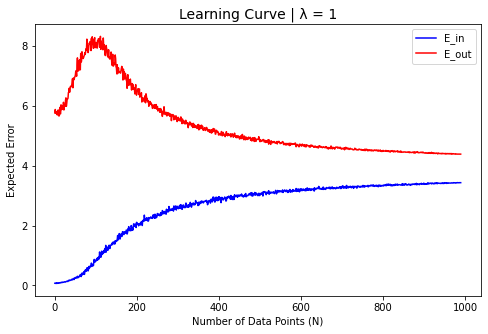

In [ ]:
plot_learning_curves(X_train_1000_100, y_train_1000_100, X_test_1000_100, y_test_1000_100, ridge_lambda=1, repetitions_to_smooth=20)

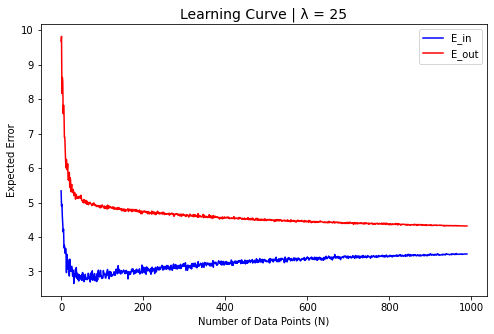

In [ ]:
plot_learning_curves(X_train_1000_100, y_train_1000_100, X_test_1000_100, y_test_1000_100, ridge_lambda=25, repetitions_to_smooth=20)

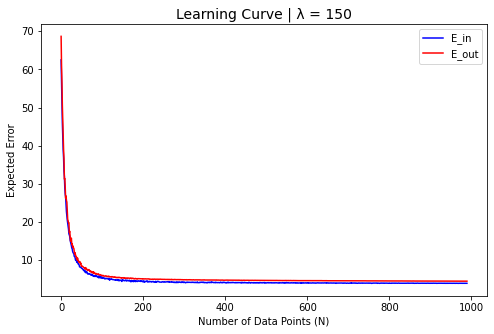

In [ ]:
plot_learning_curves(X_train_1000_100, y_train_1000_100, X_test_1000_100, y_test_1000_100, ridge_lambda=150, repetitions_to_smooth=20)